Eksik Değerler:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64


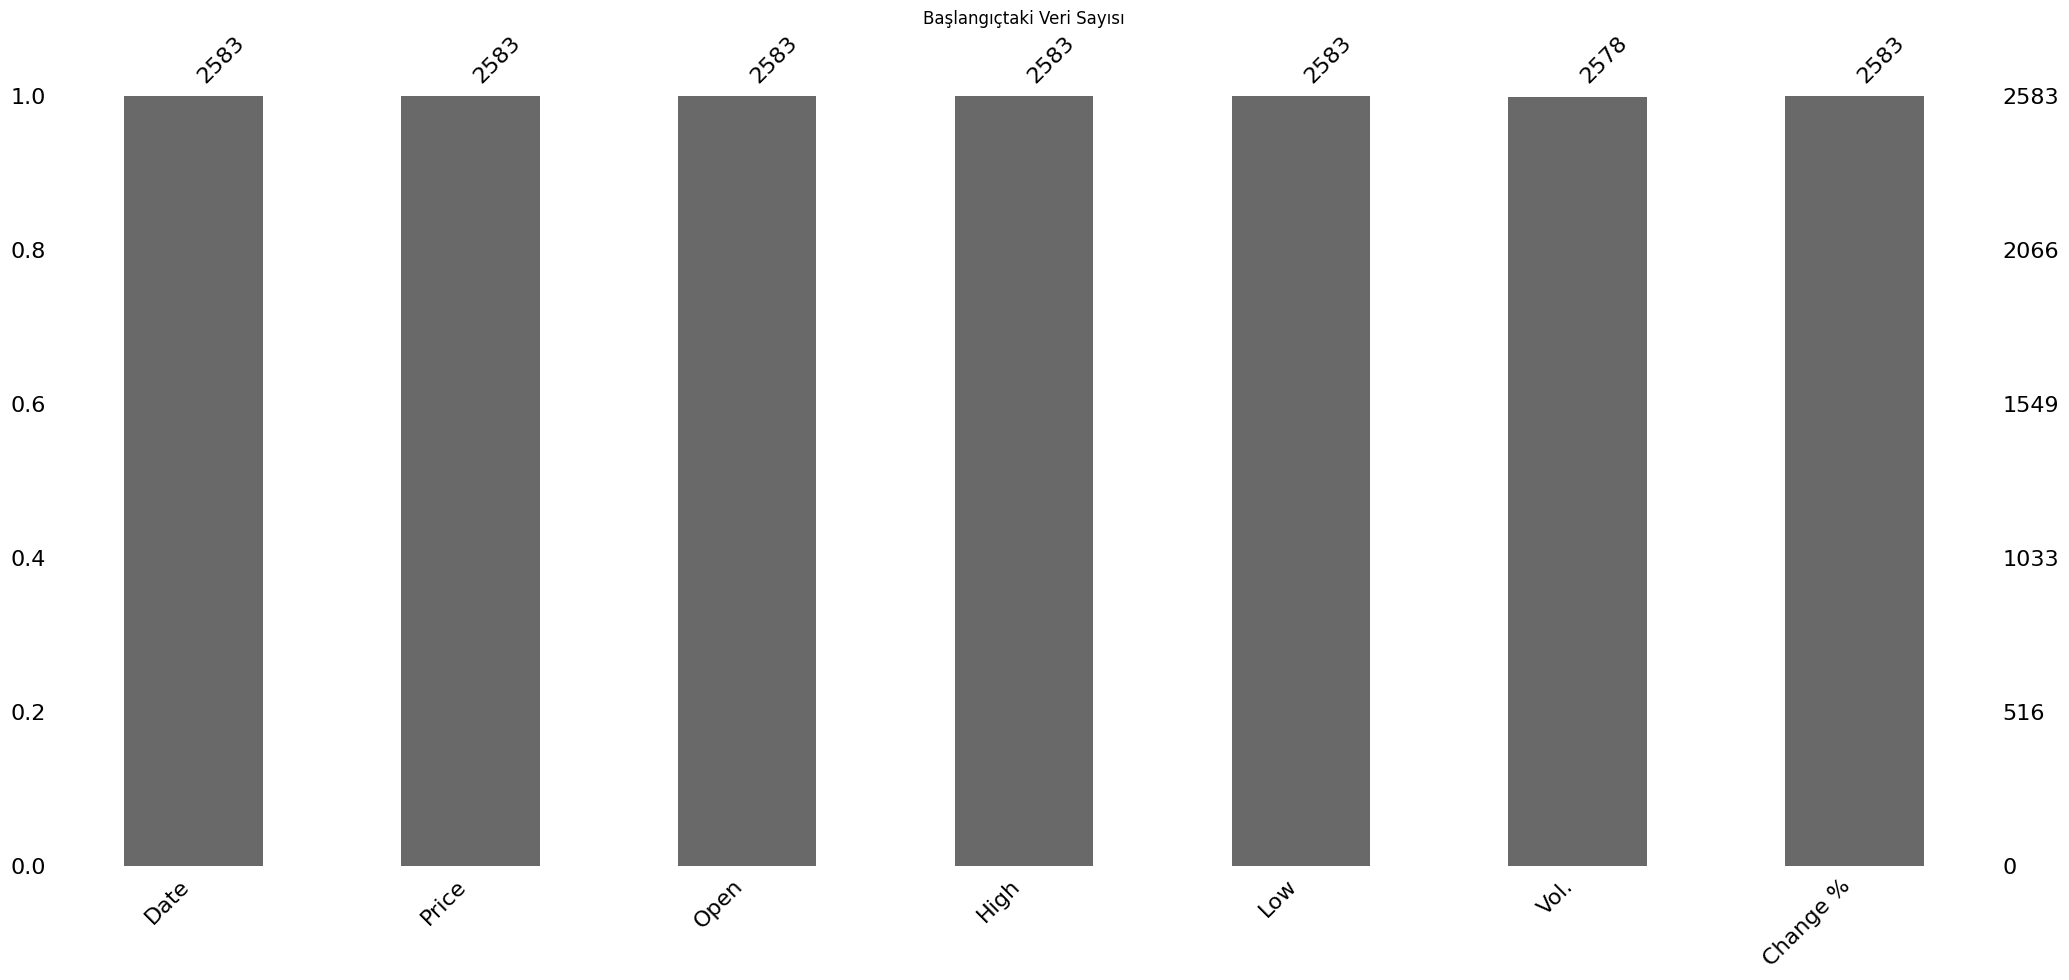

Temizleme Sonrası Eksik Değerler:
 Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


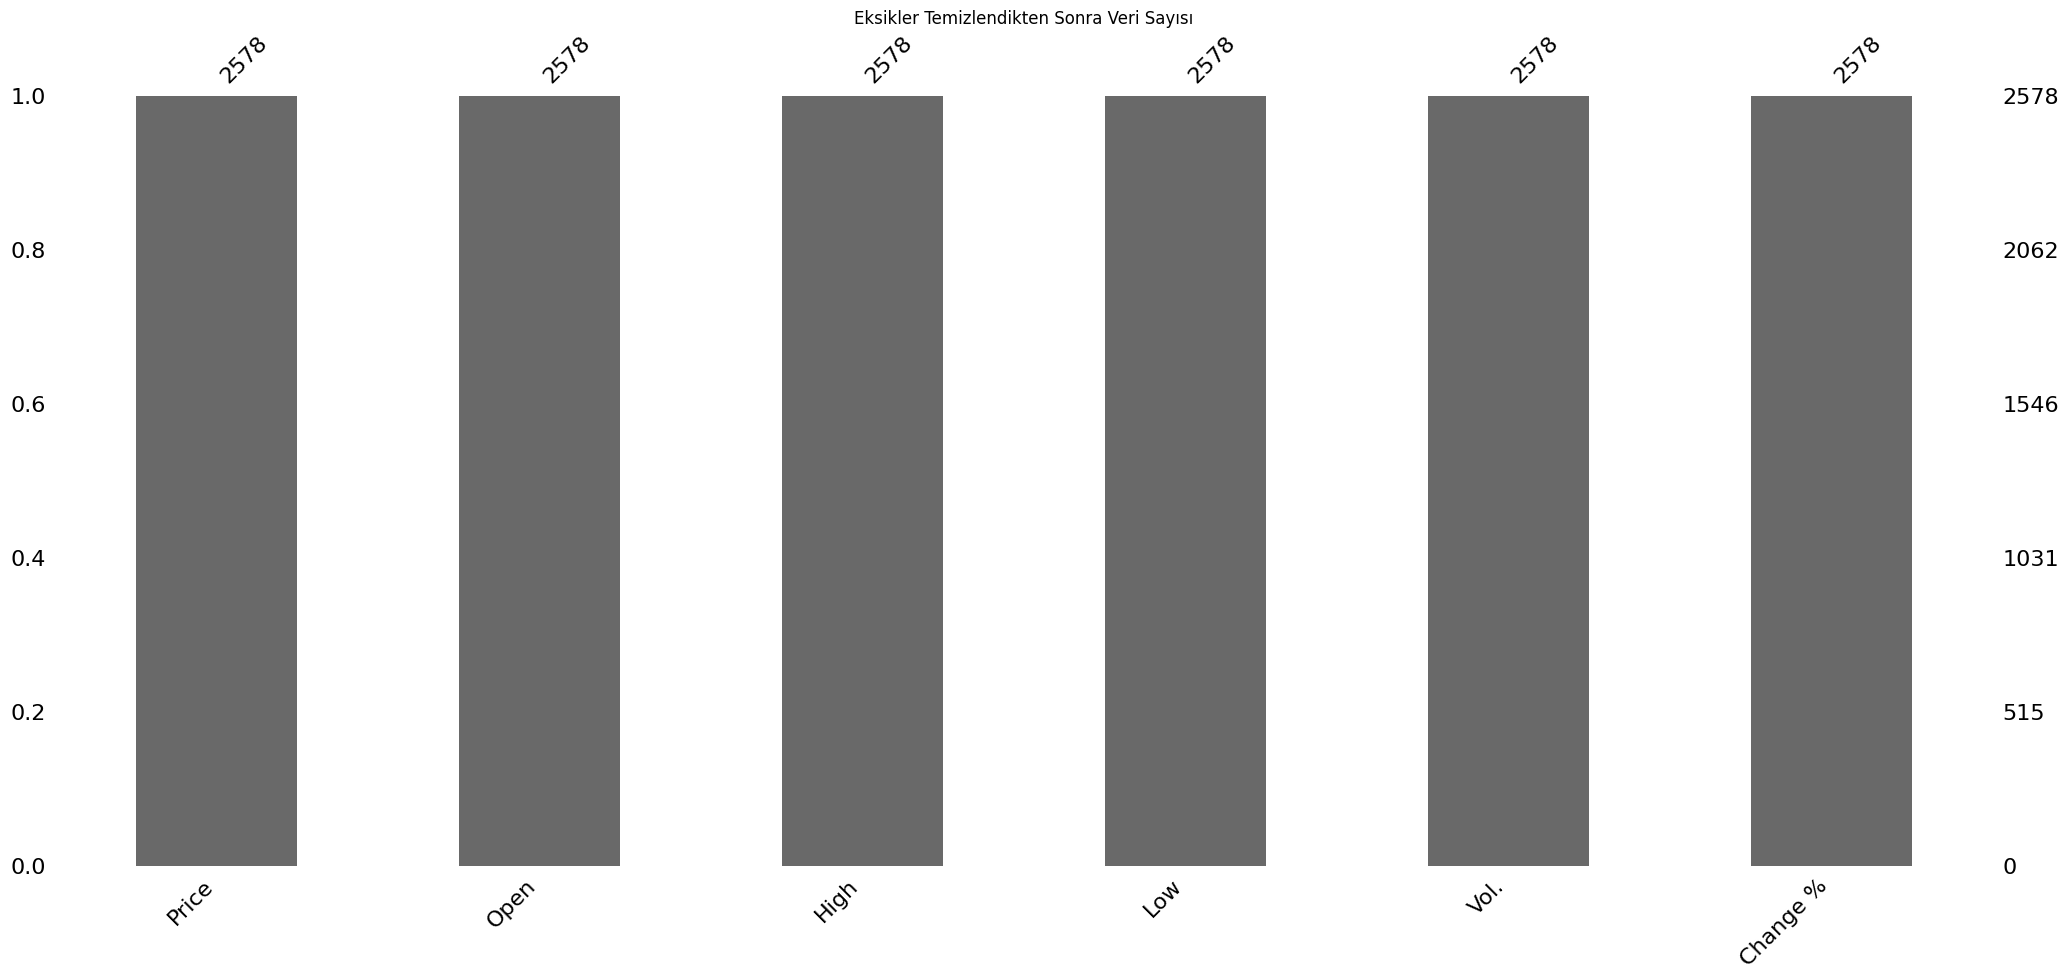

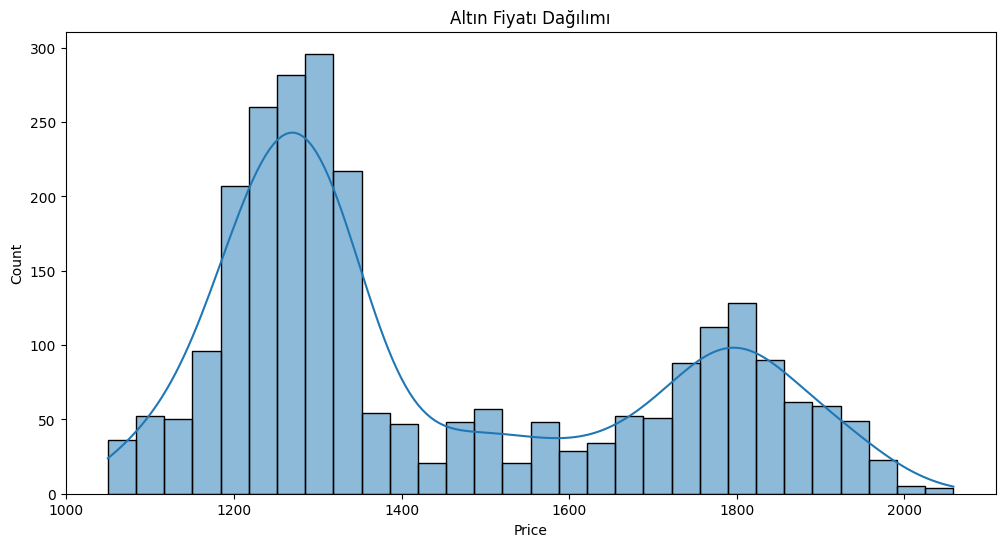

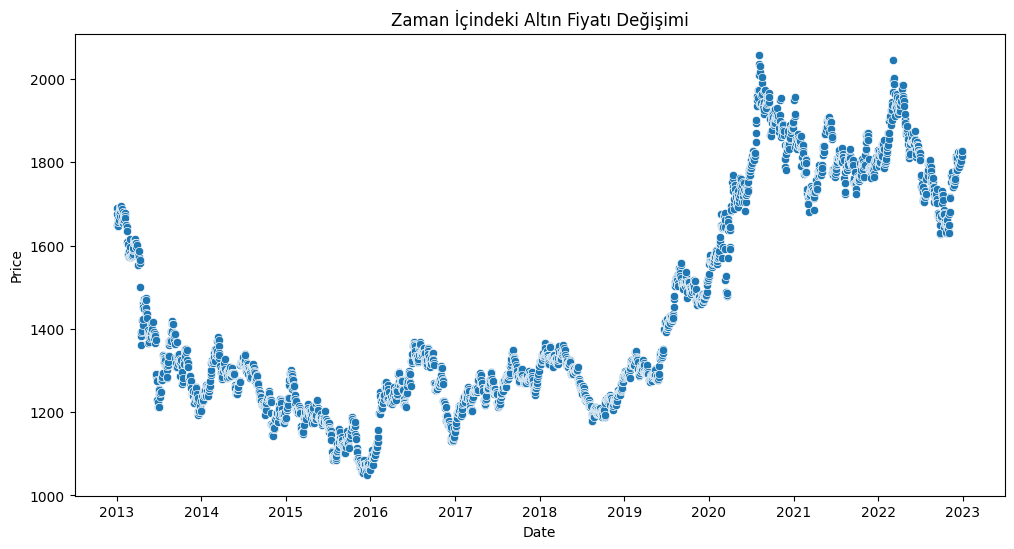

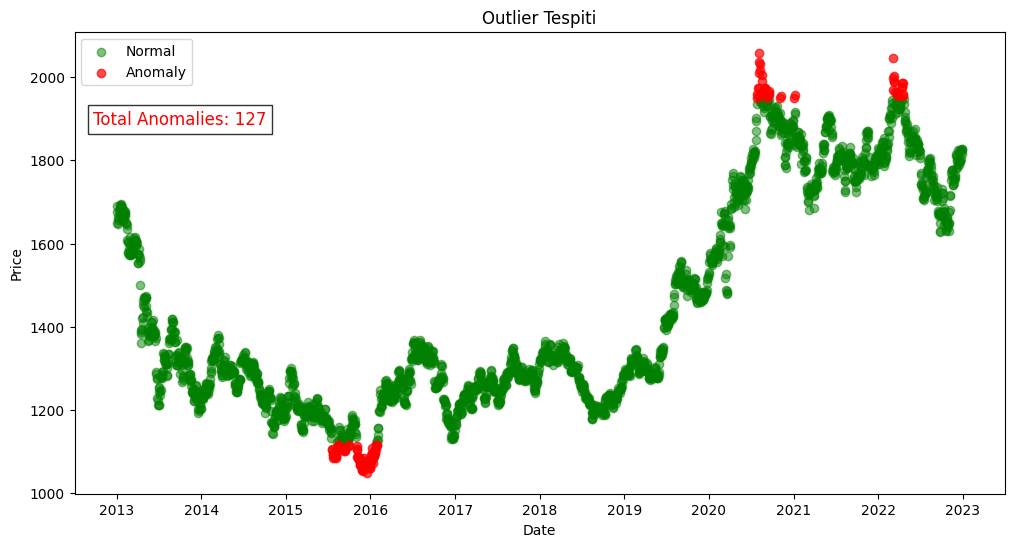

c:\Users\sueda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1: loss=1.9995, val_loss=0.9923
Epoch 2: loss=1.5376, val_loss=0.8230
Epoch 3: loss=1.2793, val_loss=0.6667
Epoch 4: loss=1.0782, val_loss=0.5723
Epoch 5: loss=0.9613, val_loss=0.4064
Epoch 6: loss=0.8723, val_loss=0.3629
Epoch 7: loss=0.6819, val_loss=0.3445
Epoch 8: loss=0.6326, val_loss=0.3085
Epoch 9: loss=0.5497, val_loss=0.2901
Epoch 10: loss=0.4911, val_loss=0.2773
Epoch 11: loss=0.4305, val_loss=0.2447
Epoch 12: loss=0.3717, val_loss=0.2326
Epoch 13: loss=0.3220, val_loss=0.2095
Epoch 14: loss=0.2864, val_loss=0.1937
Epoch 15: loss=0.2518, val_loss=0.1788
Epoch 16: loss=0.2279, val_loss=0.1660
Epoch 17: loss=0.2016, val_loss=0.1483
Epoch 18: loss=0.1795, val_loss=0.1362
Epoch 19: loss=0.1595, val_loss=0.1241
Epoch 20: loss=0.1424, val_loss=0.1170
Epoch 21: loss=0.1265, val_loss=0.1048
Epoch 22: loss=0.1134, val_loss=0.0939
Epoch 23: loss=0.1015, val_loss=0.0865
Epoch 24: loss=0.0915, val_loss=0.0778
Epoch 25: loss=0.0836, val_loss=0.0730
Epoch 26: loss=0.0753, val_loss=0.

Epoch 30: loss=0.0511, val_loss=0.0441
Model başarıyla gold_price_model.h5 dosyasına kaydedildi.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


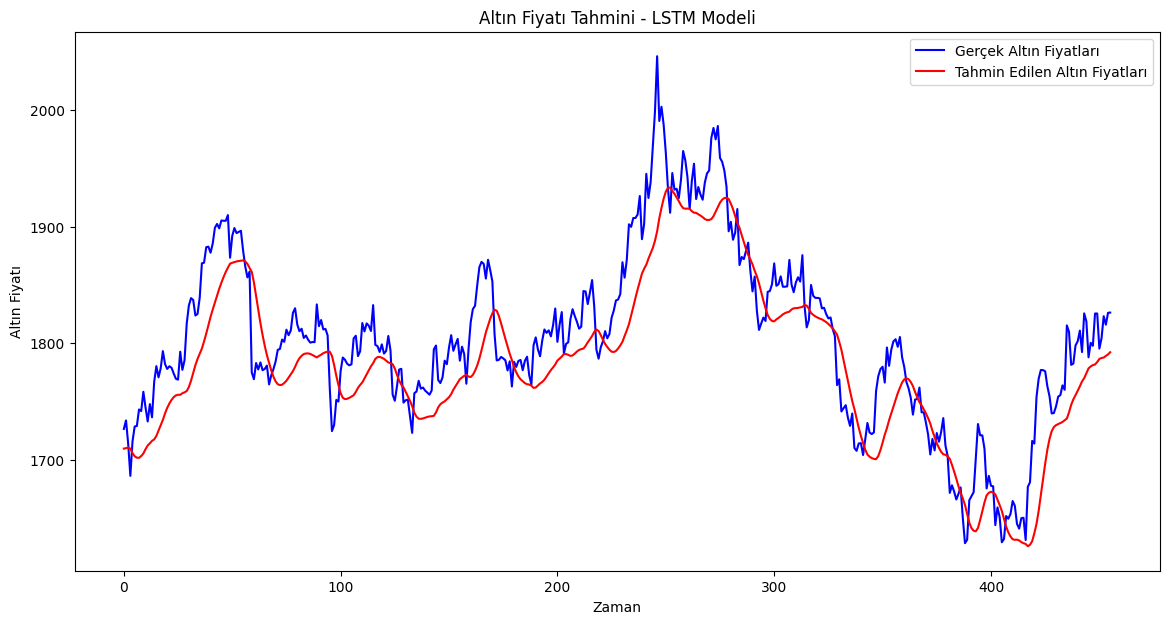

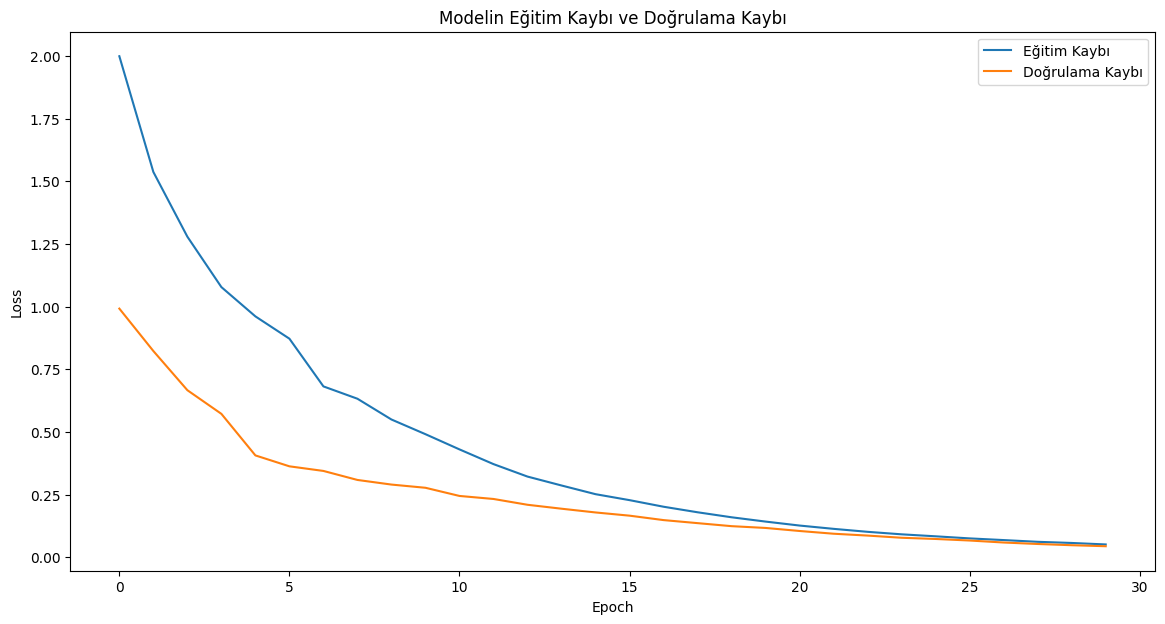

Mean Squared Error: 1507.7848049890201
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9824561403508771
F1 Score: 0.9911504424778761


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.api import *
from keras.api.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.api.models import Sequential
from keras.api.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from keras.api.optimizers import Adam
from keras.api.regularizers import l2  # Weight Decay için
import missingno as msno

# Veriyi Yükleme
df = pd.read_csv(r"C:\Users\sueda\Masaüstü\bigdata\goldprice2023.csv")

# Eksik Verilerin Kontrolü
print("Eksik Değerler:\n", df.isnull().sum())

# Eksik Verilerin Görselleştirilmesi - Başlangıçta eksik veriler
plt.figure(figsize=(12, 6))
msno.bar(df)  # Eksik veriler için bar grafiği
plt.title('Başlangıçtaki Veri Sayısı')
plt.show()


# Veriyi Temizleme ve Ön İşleme
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')  # Zaman sırasına göre sıralama
df.set_index('Date', inplace=True)  # 'Date' kolonunu index olarak ayarlama
df = df.dropna()  # Null verilerin kaldırılması

# Eksik Değerlerin Tekrar Kontrolü
print("Temizleme Sonrası Eksik Değerler:\n", df.isnull().sum())

# Eksik Verilerin Görselleştirilmesi - Temizlendikten sonra
plt.figure(figsize=(12, 6))
msno.bar(df)  # Temizlendikten sonra eksik veriler için bar grafiği
plt.title('Eksikler Temizlendikten Sonra Veri Sayısı')
plt.show()


df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Fiyatın Dağılımını Görselleştirme
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, bins=30)  # Altın fiyatlarının histogramı
plt.title('Altın Fiyatı Dağılımı')
plt.show()

# Fiyatlar ile Zaman Arasındaki İlişkiyi Görselleştirme
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df['Price'])  # Fiyatların zamanla ilişkisi
plt.title('Zaman İçindeki Altın Fiyatı Değişimi')
plt.show()

# Veriyi Normalleştirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Price']])

# Outlier Tespiti - Isolation Forest
# Özellikler
X = df[['Price']]  # Sadece Price kullanıyoruz

# Isolation Forest modeli
model_outlier = IsolationForest(contamination=0.05, random_state=42)  # contamination parametresi anomali oranını belirler
df['Anomaly'] = model_outlier.fit_predict(X)

# Anomaliler -1 ile işaretleniyor, normal veriler 1 ile
# Anomalileri filtrelemek için -1 olanları seçiyoruz
anomalies = df[df['Anomaly'] == -1]

# Normal veriler
normal = df[df['Anomaly'] == 1]

# Anomalileri ve Normal Verileri Görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(normal.index, normal['Price'], label='Normal', color='g', alpha=0.5)
plt.scatter(anomalies.index, anomalies['Price'], label='Anomaly', color='r', alpha=0.7)

# Toplam anomali sayısını hesaplama
total_anomalies = len(anomalies)

# Grafiğe toplam anomali sayısını ekleme
plt.title('Outlier Tespiti')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Anomali sayısını metin olarak ekleme
plt.text(
    x=plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.02,  # X pozisyonu (grafiğin %2'si kadar solda)
    y=plt.ylim()[1] - (plt.ylim()[1] - plt.ylim()[0]) * 0.2,  # Y pozisyonu (grafiğin %10'u kadar aşağıda)
    s=f"Total Anomalies: {total_anomalies}",
    fontsize=12,
    color='red',
    bbox=dict(facecolor='white', alpha=0.8)  # Metin kutusu arka planı
)

plt.show()


# Zaman Serisi Verisini Hazırlama
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # 'time_step' adımındaki geçmiş veriler
        y.append(data[i, 0])  # Bu adımın tahmini hedefi (fiyat)
    return np.array(X), np.array(y)

# Veriyi eğitim ve test olarak ayırma
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Eğitim verisini oluşturma
X_train, y_train = create_dataset(train_data)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # LSTM'in beklediği şekil

# Test verisini oluşturma
X_test, y_test = create_dataset(test_data)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Modelinin Kurulması
model = Sequential()

# İlk LSTM katmanı
model.add(LSTM(units=30, return_sequences=True, 
               input_shape=(X_train.shape[1], 1),
               kernel_regularizer=l2(0.01)))  # Weight decay için l2(1e-4)
model.add(BatchNormalization())
model.add(Dropout(0.4))

# İkinci LSTM katmanı
model.add(LSTM(units=30, return_sequences=False, 
               kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Çıkış katmanı
model.add(Dense(units=1, kernel_regularizer=l2(0.01)))  # Çıkışta da weight decay eklenebilir

# Optimizasyon ve Model Derleme
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Eğitim Sürecini Görselleştirmeyi Engelleme
class CustomProgbar(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            epoch_loss = logs.get('loss')
            val_loss = logs.get('val_loss')
            print(f"Epoch {epoch+1}: loss={epoch_loss:.4f}, val_loss={val_loss:.4f}")

# Model Eğitimi
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=0, callbacks=[CustomProgbar()])

model.save("goldprice_model.h5")

# Modelin Tahmin Yapması
predicted_price = model.predict(X_test)

# Tahmin Sonuçlarını ve Gerçek Fiyatları Görselleştirme
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(real_price, color='blue', label='Gerçek Altın Fiyatları')
plt.plot(predicted_price, color='red', label='Tahmin Edilen Altın Fiyatları')
plt.title('Altın Fiyatı Tahmini - LSTM Modeli')
plt.xlabel('Zaman')
plt.ylabel('Altın Fiyatı')
plt.legend()
plt.show()

# Eğitim Süreci Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Modelin Eğitim Kaybı ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Performansı
mse = mean_squared_error(real_price, predicted_price)
print(f'Mean Squared Error: {mse}')

# Sınıflandırma Sonuçlarını Hesaplama
threshold = 0.05  # %5 tolerans
predicted_class = np.abs(real_price - predicted_price) <= (threshold * real_price)

# Sınıflandırma Sonuçlarını Hesaplama
true_class = np.ones_like(predicted_class)  # Gerçek veriyi doğru kabul ediyoruz

accuracy = accuracy_score(true_class, predicted_class)
precision = precision_score(true_class, predicted_class)
recall = recall_score(true_class, predicted_class)
f1 = f1_score(true_class, predicted_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
